In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np

from IPython.display import Math, clear_output

In [2]:
def linear_function(theta, x):
    return theta[0] + theta[1] * x

def plot_function(theta, X, color):
    X_new = [min(X) - 1, max(X) + 1]
    y_new = [linear_function(theta, x) for x in X_new]
    plt.plot(X_new, y_new, linewidth=2, color=color)

def plot_points(X, y):
    plt.figure(figsize=(20, 10))
    plt.scatter(X, y, s=200)
    plt.xlabel("Liczba pożarów")
    plt.ylabel("Liczba włamań")

Plik `fires_thefts.csv` zawiera rzeczywiste dane zebrane przez _U.S. Commission on Civil Rights_, przedstawiające liczbę pożarów w danej dzielnicy na tysiąc gospodarstw domowych (pierwsza kolumna) oraz liczbę włamań w tej samej dzielnicy na tysiąc mieszkańców (druga kolumna). Celem jest stworzenie modelu przewidującego liczbę włamań na podstawie liczby pożarów.

### Zadanie 2

Wczytaj dane z pliku, a następnie stwórz zmienne X i y oraz przypisz im odpowiednie wartości.

In [24]:
df = pd.read_csv('fires_thefts__1_.csv')
X=df[['fires']].values
y= df['thefts'].values
print(X[:5])
print()
print(y[:5])

[[ 6.2]
 [ 9.5]
 [10.5]
 [ 7.7]
 [ 8.6]]

[29 44 36 37 53]


### Zadanie 3

Dokończ implementację funkcji J, która jest funkcją kosztu i realizuję metodę najmniejszych kwadratów. dla przypomnienia, jej wzór wygląda następująco:

$$\begin{array}{rll} J(\theta) &=& \dfrac{1}{2m} \displaystyle\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})  - y^{(i)}\right)^2
\end{array} $$

gdzie $m$ - liczba przykładów w zestawie danych

In [26]:
#h - linear_function
def J(h, theta, X, y):
    # h to funkcja
    # theta to lista współczynników: [theta_0, theta_1]
    # X i y to zmienne przechowujące dane
    # wywołanie tej funkcji w sposób J(linear_function, [1, 2], X, y) powinno zwrócić wartość 228.41857142857137
    m=y.size
    return 1/(2*m)*sum((h(theta,X[i][0])-y[i])**2 for i in range(m))

In [27]:
J(linear_function,[1,2],X,y)

228.41857142857137

In [28]:
J(linear_function,[0.1,0.1],X,y)

769.1439035714287

### Zadanie 4

Dobierz ręcznie, przy pomocy poniższych widgetów (nie zmieniając kodu) parametry theta w taki sposób, by wartość funkcji kosztu była możliwie jak najmniejsza

In [29]:
slider_theta_0 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta0', layout={'width': "auto"})
slider_theta_1 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta1', layout={'width': "auto"})
out = widgets.Output()
button = widgets.Button(width=100, description="Show")

def btn_event_handler(event):
    with out:
        clear_output(wait=True)
        plot_points(X, y)
        plot_function([slider_theta_0.value, slider_theta_1.value], X, 'r')
        plt.show()
        display(Math(rf"\Large J(\theta) = {J(linear_function, [slider_theta_0.value, slider_theta_1.value], X, y):.4f}"))


with out:
    plot_points(X, y)
    plt.show()

button.on_click(btn_event_handler)
display(widgets.VBox([slider_theta_0, slider_theta_1, button]))
display(out)

Output()

### Zadanie 5

Wytrenuj na tych danych model regresji liniowej

In [33]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [34]:
model.intercept_

16.99515723273957

In [35]:
model.coef_

array([1.313456])

### Zadanie 6

Korzystając z zaimplementowanych wyżej funkcji oraz współczynników wytrenowanego modelu nanieś na wykres prostę regresyjną i oblicz wartość funkcji kosztu dla tych współczynników. Spójrz, jak daleko byłeś od idealnego rozwiązania dobierając parametry ręcznie.

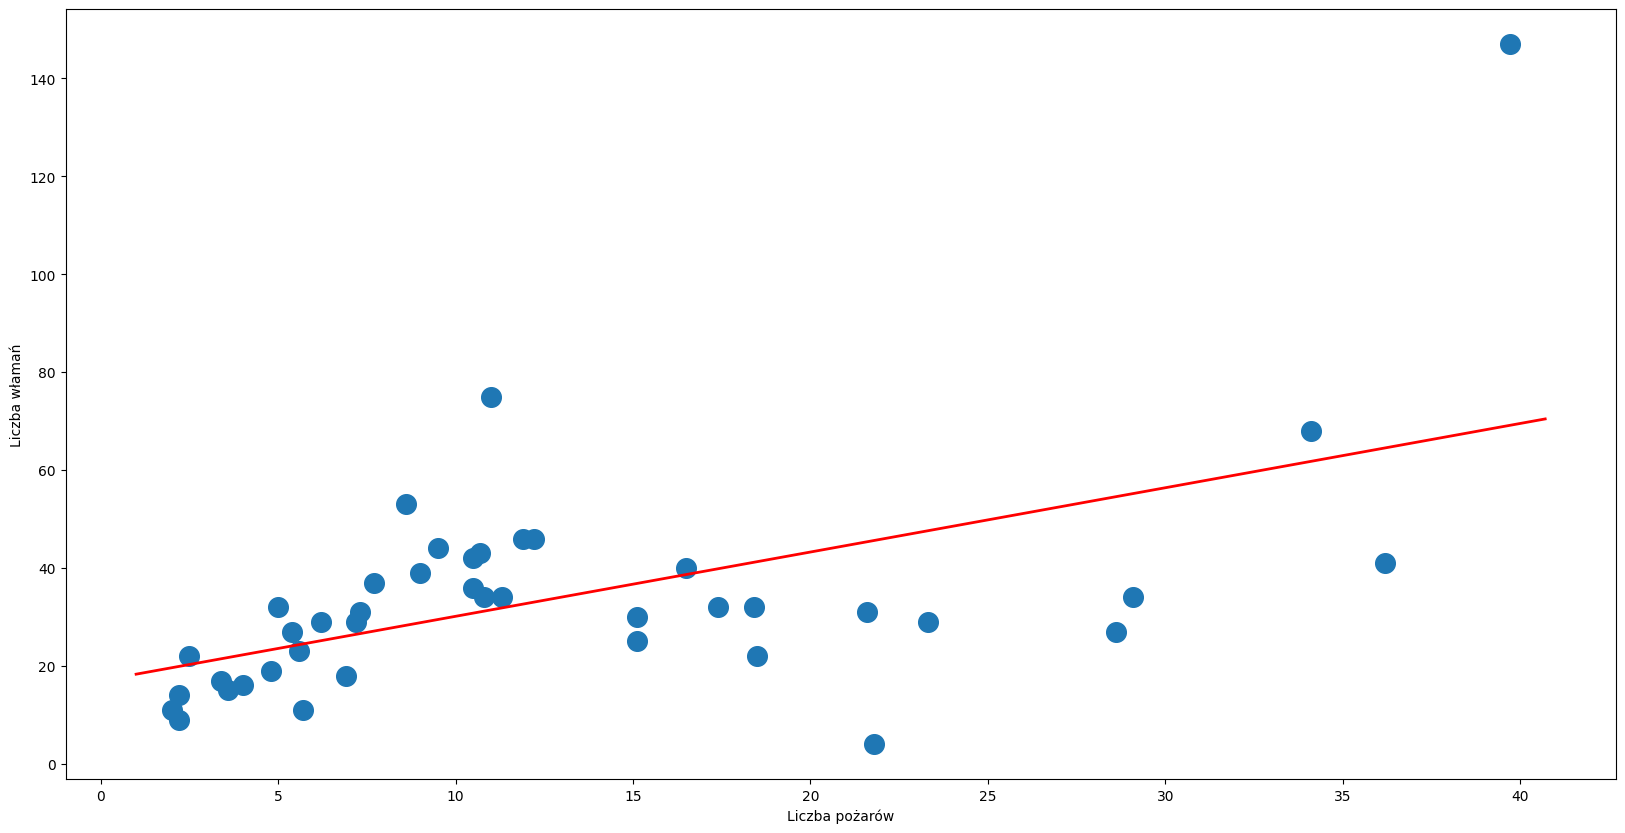

In [36]:
theta=np.concatenate([[model.intercept_],model.coef_])
theta
plot_points(X,y)
plot_function(theta,X,'r')
plt.show()

In [4]:
#1.31 - wraz ze wzrostem liczby pożarów na 1000 mieszkańców o 1 liczba kradzieży na 1000 mieszkańców wzrośnie o 1.31

In [37]:
J(linear_function,theta,X,y)

180.4100782065511

### Zadanie 7

Wykorzystując uzyskany model regresyjny przepowiedz liczbę włamań na tysiąc mieszkańców dla dzielnic, w których występują średnio kolejno: 10, 20 i 50 pożarów na tysiąc gospodarstw domowych.

In [32]:
predict_data=np.array([[10],[20],[50]])
model.predict(predict_data)

array([30.12971728, 43.26427733, 82.66795748])

### Zadanie 8

Wytrenuj model regresyjny drzewa decyzyjnego i dokonaj predykcji dla tych samych wartości pożarów na tysiąc gospodarstw domowych co wyżej. Porównaj otrzymane wyniki.

Stwórz drugi model drzewa decyzyjnego, w którym ograniczysz maksymalną głębokość i minimalną liczbę obserwacji w liściu.

Następnie zwizualizuj to drzewo.

In [38]:
from sklearn.tree import DecisionTreeRegressor
X = df[["fires"]]
y = df["thefts"]
predict_data=np.array([[10], [20], [50]])
model=DecisionTreeRegressor()
model.fit(X,y)
model.predict(predict_data)

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([ 44.,  22., 147.])

In [39]:
model=DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)
model.fit(X.values,y)
model.predict(predict_data)

array([38.875     , 27.22222222, 63.4       ])

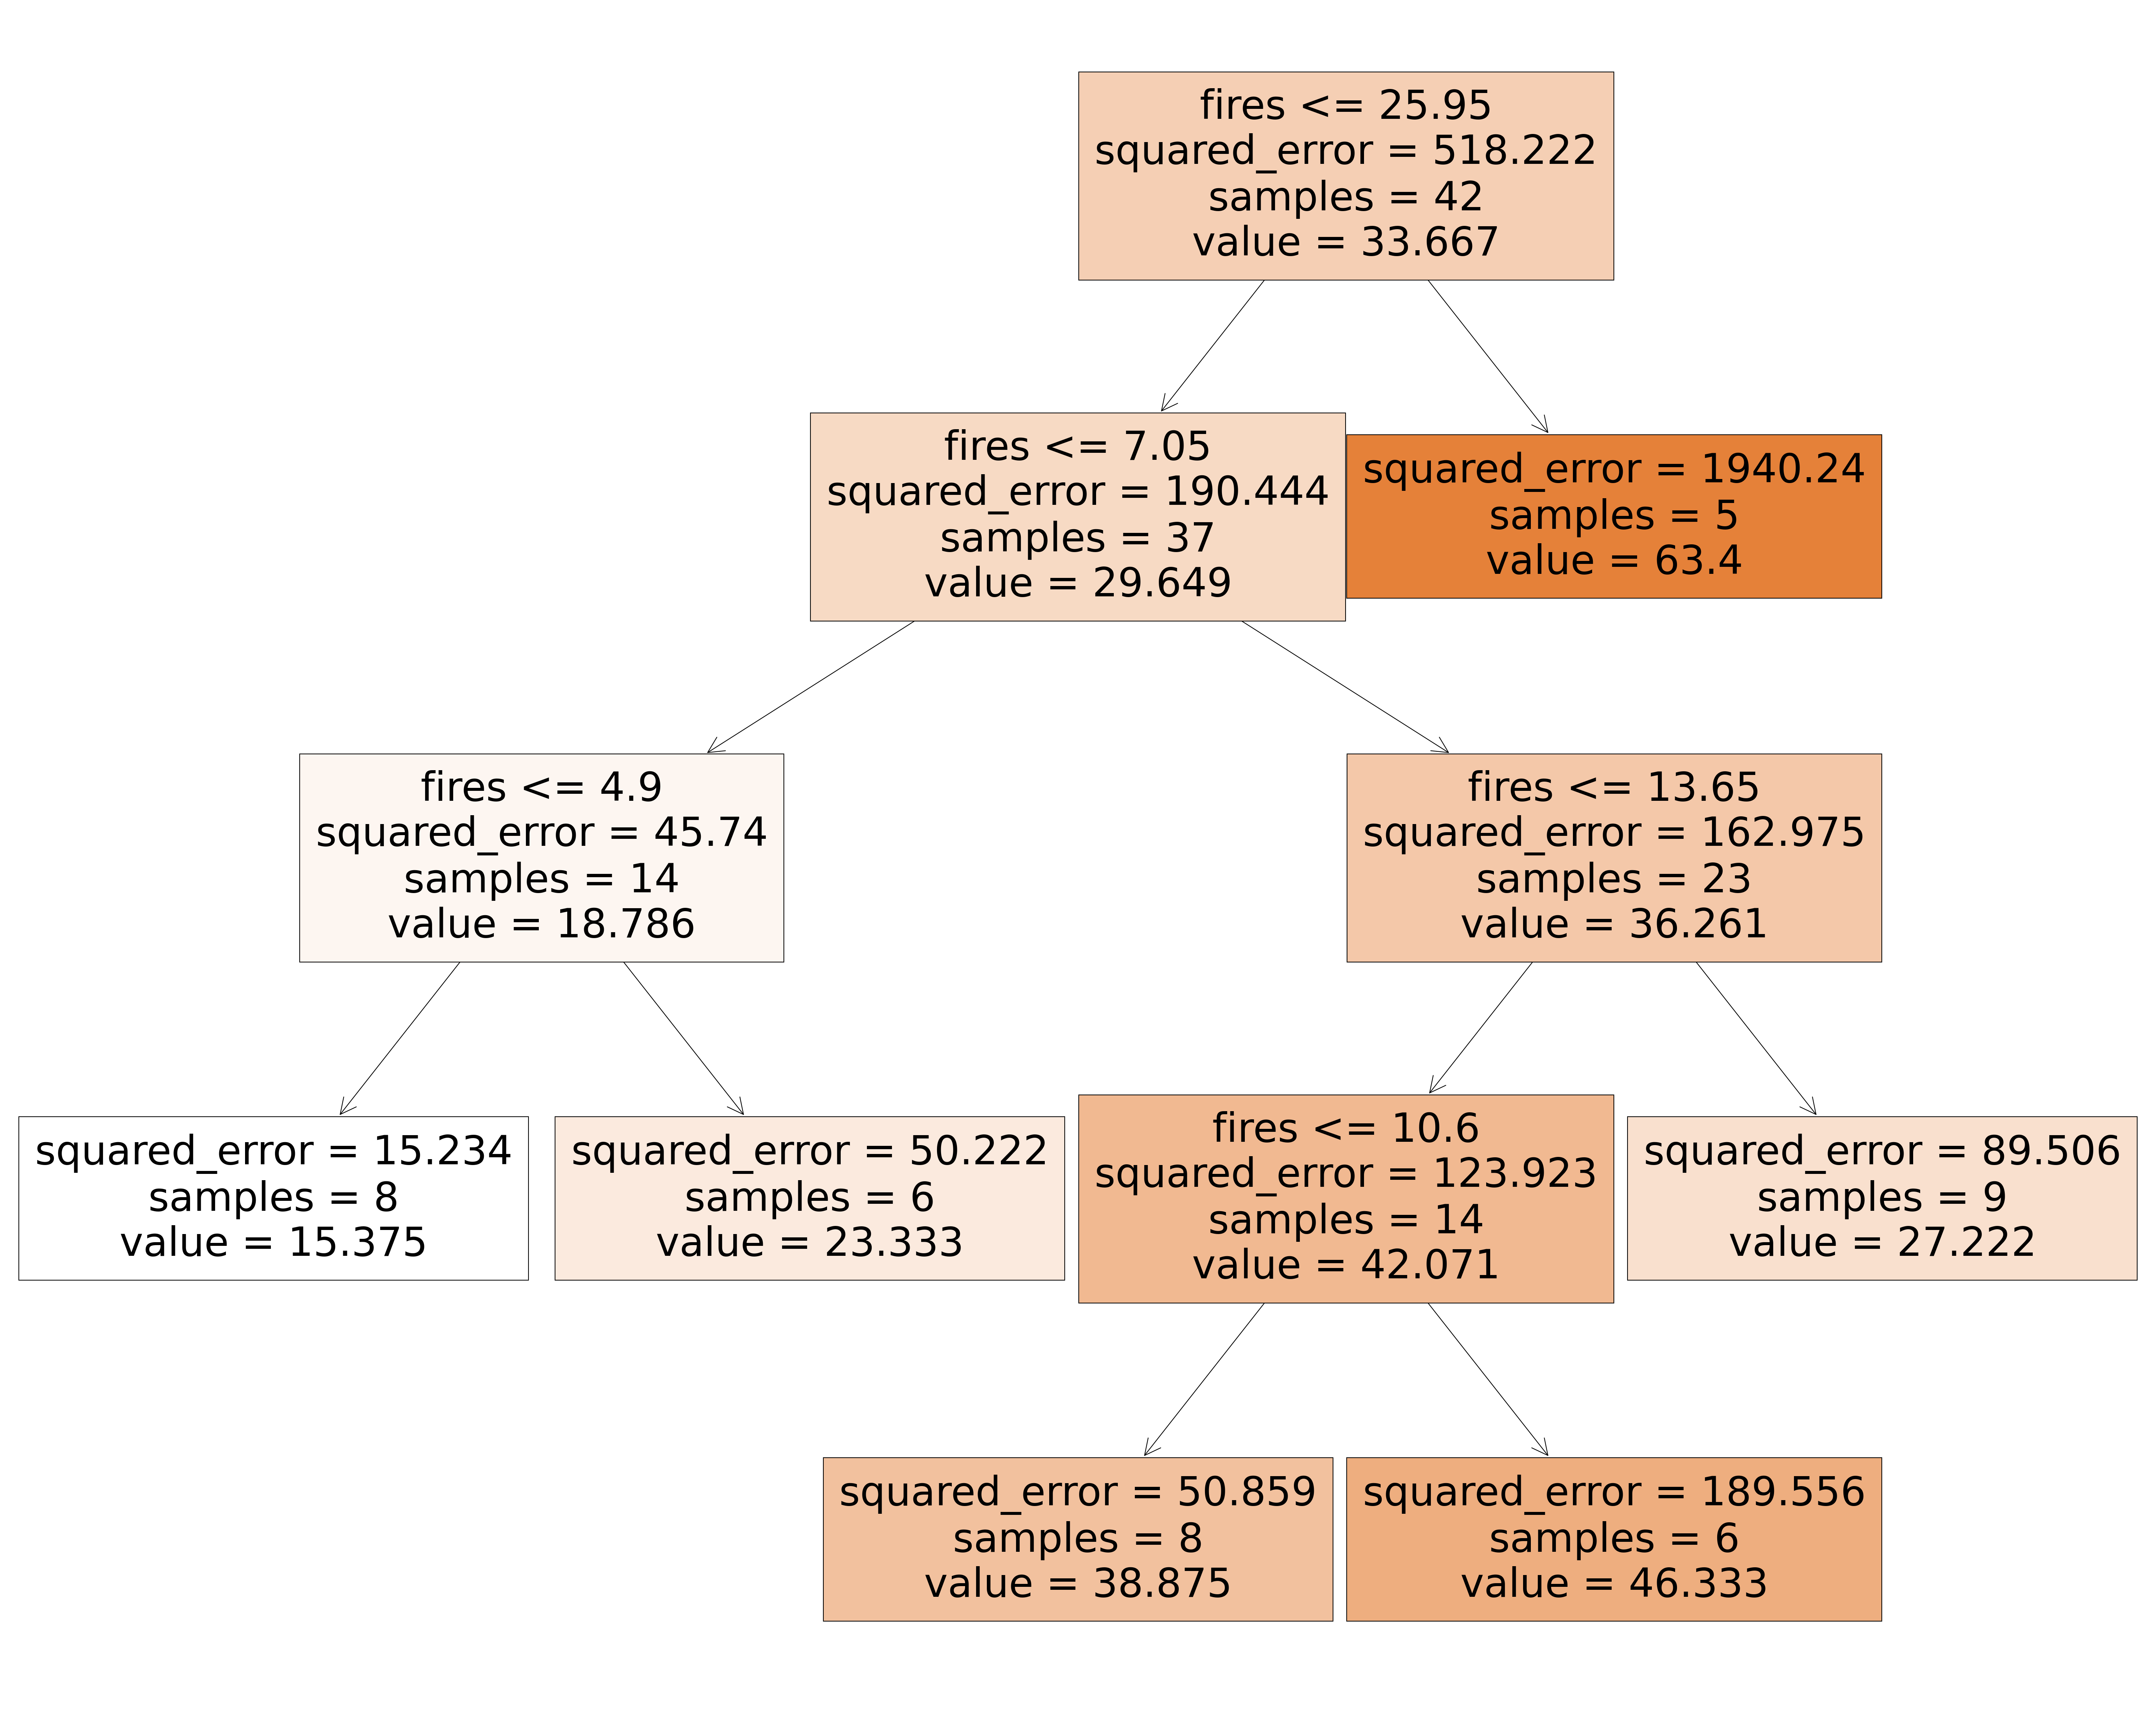

In [40]:
from sklearn import tree
fig=plt.figure(figsize=(50,40),dpi=150)
tree_plot=tree.plot_tree(model,feature_names=X.columns,filled=True)